In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import hamiltonians as hamiltonians
from pauli_matrices import *
import quantum_tools as qt

In [5]:
# Create a quantum system with a single qubit
natural_freq = 10 * 10**9
driving_freq = 10 * 10**9
rabi_freq = 5 * 10**6



# CCD parameters
phi_0, epsilon_m, phase_freq, theta_m = 0, rabi_freq/4, rabi_freq, 0



# Integration parameters
tol = 10**-6
evaluation_points = 1000
evaluation_time = 10*10**-6



## Calculate measuring times

In [25]:
print( 1/rabi_freq)

2e-07


In [27]:
detunings = np.linspace(0, 2*10e6, 1000)
t, U1s = qt.calculate_unitaries(1, evaluation_time, evaluation_points, hamiltonians.ccd_rwa,
                        driving_freq=driving_freq,
                        natural_freq =  natural_freq, rabi_freq=rabi_freq, phi_0=phi_0,
                        epsilon_m=epsilon_m,
                        phase_freq=phase_freq,
                        theta_m=theta_m)
fid_1 = qt.calculate_fidelities(np.eye(2), U1s, 2)



/var/folders/r1/4bsh28x136nb61xfvz5ly0dh0000gn/T/ipykernel_28922/1815665864.py:21: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


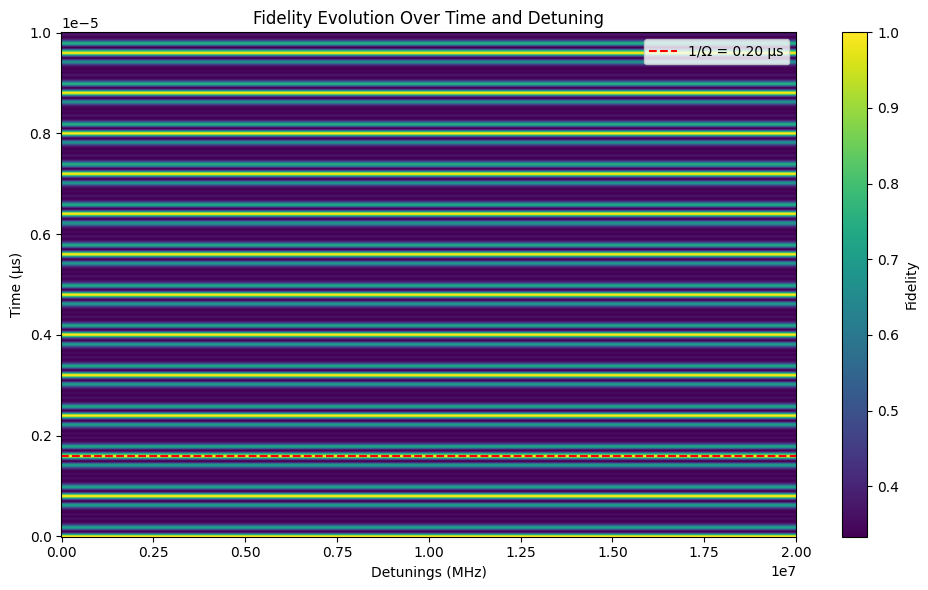

In [37]:
plt.figure(figsize=(10, 6))

# Plot the fidelity data as a color map
plt.pcolormesh(detunings, t, np.array([fid_1 for a in range(len(detunings))]).T, shading='auto', cmap='viridis')

# Add a horizontal line at t = 1/rabi_freq
plt.axhline(y=8*1/rabi_freq, color='r', linestyle='--', label=f'1/Ω = {1/rabi_freq*1e6:.2f} µs')

# Add a colorbar
plt.colorbar(label='Fidelity')

# Set labels and title
plt.xlabel('Detunings (MHz)')
plt.ylabel('Time (µs)')
plt.title('Fidelity Evolution Over Time and Detuning')

# Add legend
plt.legend()

# Adjust layout to prevent label clipping
plt.tight_layout()

# Show the plot
plt.show()

## No multiprocessing

In [3]:



detunings = np.linspace(0, 2*10e6, 10)

fids_1 = []
fids_2 = []
fids_seperate = []
fids_together = []

fid_combined_Us = []

t, U1s = qt.calculate_unitaries(1, evaluation_time, evaluation_points, hamiltonians.ccd_rwa,
                        driving_freq=driving_freq,
                        natural_freq =  natural_freq, rabi_freq=rabi_freq, phi_0=phi_0,
                        epsilon_m=epsilon_m,
                        phase_freq=phase_freq,
                        theta_m=theta_m)
fid_1 = qt.calculate_fidelities(np.eye(2), U1s, 2)

for detuning in detunings:


    t, U2s = qt.calculate_unitaries(1, evaluation_time, evaluation_points, hamiltonians.ccd_rwa,
                        driving_freq=driving_freq,
                        natural_freq =  natural_freq+detuning, rabi_freq=rabi_freq, phi_0=phi_0,
                        epsilon_m=epsilon_m,
                        phase_freq=phase_freq,
                        theta_m=theta_m)
    fid_2 = qt.calculate_fidelities(np.eye(2), U2s, 2)
    

    
    


    fid_seperate = (np.abs((6*fid_1-2)*(6*fid_2-2))+4)/20

    fids_1.append(fid_1)
    fids_2.append(fid_2)
    fids_seperate.append(fid_seperate)

    fid_combined_U_det = []
    for U1, U2 in zip(U1s, U2s):
        U = np.kron(U1, U2)
        fid_combined = qt.calculate_fidelities(np.eye(4), [U], 2**2)
        fid_combined_U_det.append(fid_combined[0])
    fid_combined_Us.append(fid_combined_U_det)

    natural_freqs = np.array([natural_freq, natural_freq+detuning])
    # Recalculate the unitaries with the updated Hamiltonian

    times, Us = qt.calculate_unitaries(2, evaluation_time, evaluation_points, hamiltonians.ccd_rwa_multiple, 
                                                driving_freq=driving_freq, natural_freqs =  natural_freqs, rabi_freq=rabi_freq,
                                                phi_0=phi_0, epsilon_m=epsilon_m, 
                                                phase_freq=phase_freq, theta_m=theta_m, coupling=0)
    
    # Calculate the fidelities for the unitaries at all times
    fid_together = qt.calculate_fidelities(np.eye(4), Us, 2**2)
    fids_together.append(fid_together)


[[np.float64(1.0), np.float64(0.9521143528028801), np.float64(0.8255055660396527), np.float64(0.6607180303062704), np.float64(0.49974037724385223), np.float64(0.36992444597084956), np.float64(0.2809591256710638), np.float64(0.22989146597223198), np.float64(0.2070959771402404), np.float64(0.2006238829163988), np.float64(0.20000021787775796), np.float64(0.2001774837991503), np.float64(0.2038118644782187), np.float64(0.21929641266245045), np.float64(0.25463874335879944), np.float64(0.31046301724729625), np.float64(0.37618273845844974), np.float64(0.4321581989666283), np.float64(0.45828810993819813), np.float64(0.44521080108706823), np.float64(0.40014340040941254), np.float64(0.34179556510702447), np.float64(0.2884844698649521), np.float64(0.24962728961467812), np.float64(0.22558818979220052), np.float64(0.21233773435522263), np.float64(0.2055516794616279), np.float64(0.20223898769931092), np.float64(0.20072591020188896), np.float64(0.20014666513560114), np.float64(0.200008383864802), np.f

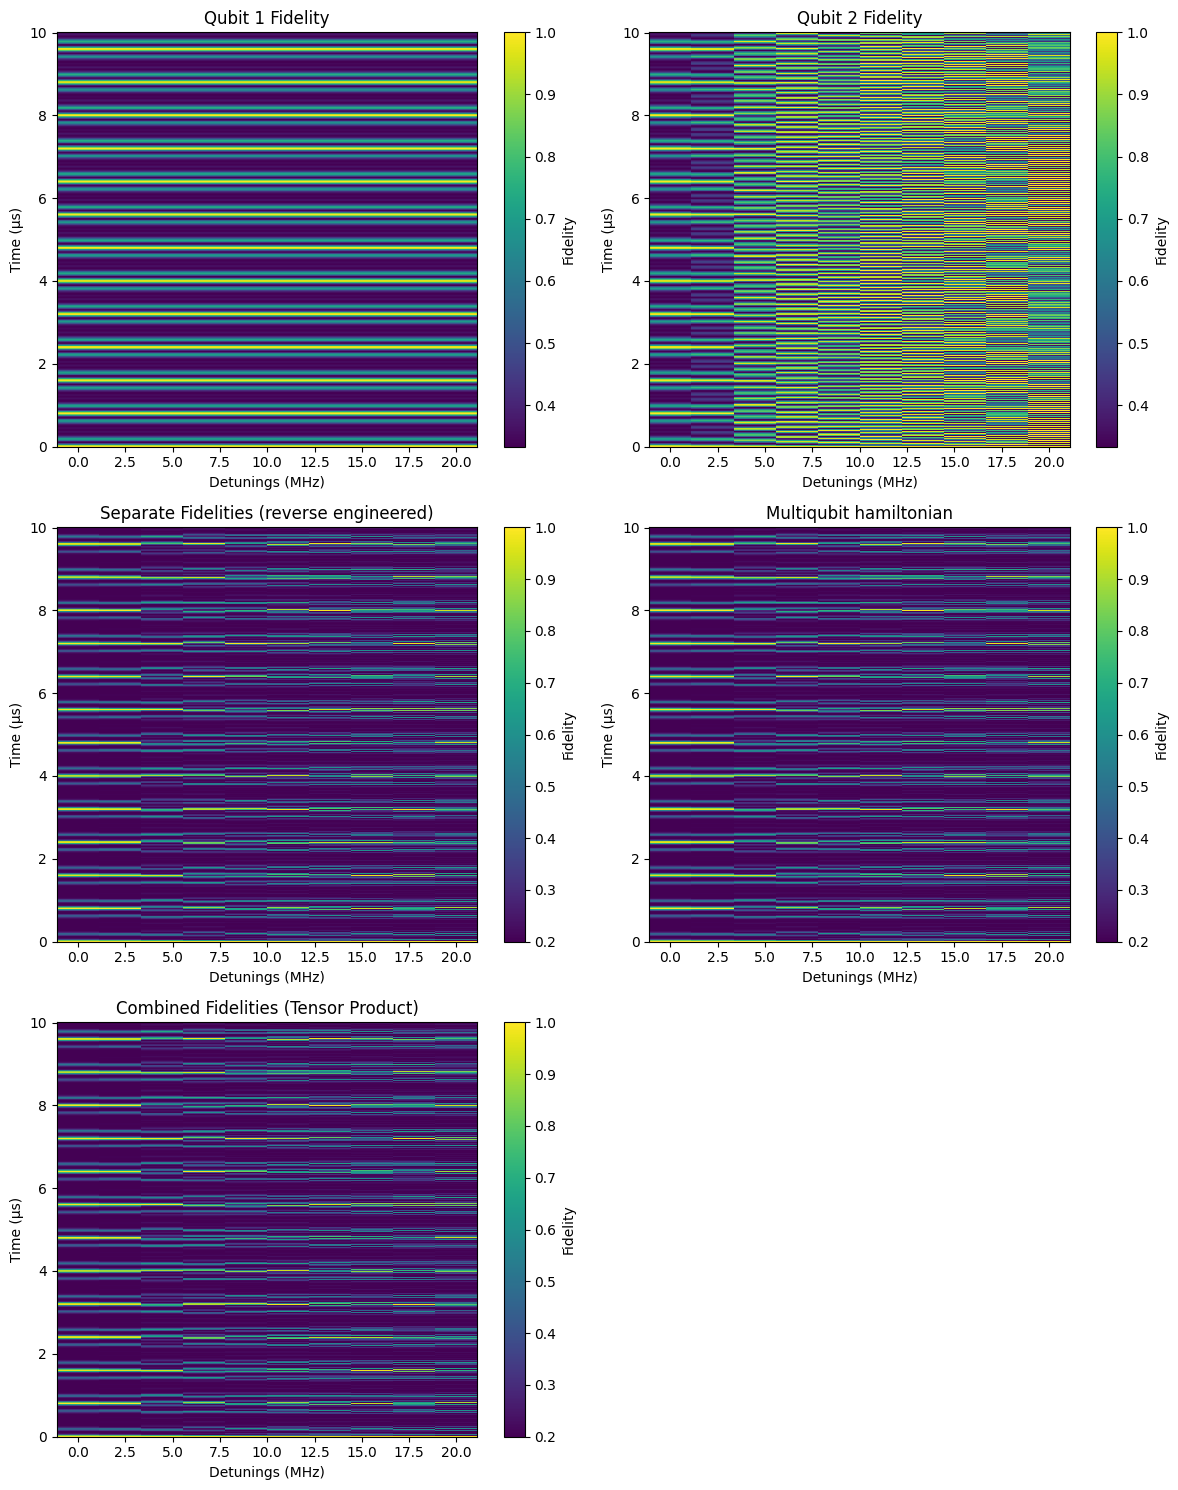

In [4]:
# Convert detunings to MHz and times to microseconds
detunings_mhz = detunings / 1e6
times_us = times * 1e6

# Create a figure with 5 subplots in a 3x2 grid
fig, ((ax1, ax2), (ax3, ax4), (ax5, _)) = plt.subplots(3, 2, figsize=(12, 15))

print(fid_combined_Us)

# Create color plots
im1 = ax1.pcolormesh(detunings_mhz, times_us, np.array(fids_1).T, shading='auto', cmap='viridis')
im2 = ax2.pcolormesh(detunings_mhz, times_us, np.array(fids_2).T, shading='auto', cmap='viridis')
im3 = ax3.pcolormesh(detunings_mhz, times_us, np.array(fids_seperate).T, shading='auto', cmap='viridis')
im4 = ax4.pcolormesh(detunings_mhz, times_us, np.array(fids_together).T, shading='auto', cmap='viridis')
im5 = ax5.pcolormesh(detunings_mhz, times_us, np.array(fid_combined_Us).T, shading='auto', cmap='viridis')


# Add colorbars
fig.colorbar(im1, ax=ax1, label='Fidelity')
fig.colorbar(im2, ax=ax2, label='Fidelity')
fig.colorbar(im3, ax=ax3, label='Fidelity')
fig.colorbar(im4, ax=ax4, label='Fidelity')
fig.colorbar(im5, ax=ax5, label='Fidelity')

# Set labels and titles
ax1.set_xlabel('Detunings (MHz)')
ax1.set_ylabel('Time (µs)')
ax1.set_title('Qubit 1 Fidelity')

ax2.set_xlabel('Detunings (MHz)')
ax2.set_ylabel('Time (µs)')
ax2.set_title('Qubit 2 Fidelity')

ax3.set_xlabel('Detunings (MHz)')
ax3.set_ylabel('Time (µs)')
ax3.set_title('Separate Fidelities (reverse engineered)')

ax4.set_xlabel('Detunings (MHz)')
ax4.set_ylabel('Time (µs)')
ax4.set_title('Multiqubit hamiltonian')

ax5.set_xlabel('Detunings (MHz)')
ax5.set_ylabel('Time (µs)')
ax5.set_title('Combined Fidelities (Tensor Product)')

# Remove the empty subplot
_.remove()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

## Multiprocessing

In [ ]:
import numpy as np
import multiprocess as mp  # Use multiprocess instead of multiprocessing
import dill  # For more robust serialization

detunings = np.linspace(0, 2*10e6, 1000)

# Define processing function
def process_detuning(detuning, **kwargs):
    """Process a single detuning value with given parameters"""
    # Extract parameters from kwargs
    natural_freq = kwargs['natural_freq']
    evaluation_time = kwargs['evaluation_time']
    evaluation_points = kwargs['evaluation_points']
    driving_freq = kwargs['driving_freq']
    rabi_freq = kwargs['rabi_freq']
    phi_0 = kwargs['phi_0']
    epsilon_m = kwargs['epsilon_m']
    phase_freq = kwargs['phase_freq']
    theta_m = kwargs['theta_m']
    
    fids_1 = []
    fids_2 = []
    fids_seperate = []
    fids_together = []

    fid_combined_Us = []

    t, U1s = qt.calculate_unitaries(1, evaluation_time, evaluation_points, hamiltonians.ccd_rwa,
                            driving_freq=driving_freq,
                            natural_freq =  natural_freq, rabi_freq=rabi_freq, phi_0=phi_0,
                            epsilon_m=epsilon_m,
                            phase_freq=phase_freq,
                            theta_m=theta_m)
    fid_1 = qt.calculate_fidelities(np.eye(2), U1s, 2)




    t, U2s = qt.calculate_unitaries(1, evaluation_time, evaluation_points, hamiltonians.ccd_rwa,
                        driving_freq=driving_freq,
                        natural_freq =  natural_freq+detuning, rabi_freq=rabi_freq, phi_0=phi_0,
                        epsilon_m=epsilon_m,
                        phase_freq=phase_freq,
                        theta_m=theta_m)
    fid_2 = qt.calculate_fidelities(np.eye(2), U2s, 2)






    fid_seperate = (np.abs((6*fid_1-2)*(6*fid_2-2))+4)/20

    fids_1.append(fid_1)
    fids_2.append(fid_2)
    fids_seperate.append(fid_seperate)



    natural_freqs = np.array([natural_freq, natural_freq+detuning])
    # Recalculate the unitaries with the updated Hamiltonian

    times, Us = qt.calculate_unitaries(2, evaluation_time, evaluation_points, hamiltonians.ccd_rwa_multiple, 
                                                driving_freq=driving_freq, natural_freqs =  natural_freqs, rabi_freq=rabi_freq,
                                                phi_0=phi_0, epsilon_m=epsilon_m, 
                                                phase_freq=phase_freq, theta_m=theta_m, coupling=0)

    # Calculate the fidelities for the unitaries at all times
    fid_together = qt.calculate_fidelities(np.eye(4), Us, 2**2)
    fids_together.append(fid_together)
    return (times, fid_1, fid_2, fid_seperate, fid_combined_Us, fid_together)

# Package parameters
params = {
    'natural_freq': natural_freq,
    'evaluation_time': evaluation_time,
    'evaluation_points': evaluation_points,
    'driving_freq': driving_freq,
    'rabi_freq': rabi_freq,
    'phi_0': phi_0,
    'epsilon_m': epsilon_m,
    'phase_freq': phase_freq,
    'theta_m': theta_m
}

# Create pool with dill serialization
if __name__ == '__main__':
    with mp.Pool() as pool:
        # Use partial to fix the kwargs
        worker = dill.dumps(lambda x: process_detuning(x, **params))
        results = pool.map(dill.loads(worker), detunings)

# Unpack results
times, fids_1, fids_2, fids_seperate, fid_combined_Us, fids_together = zip(*results)

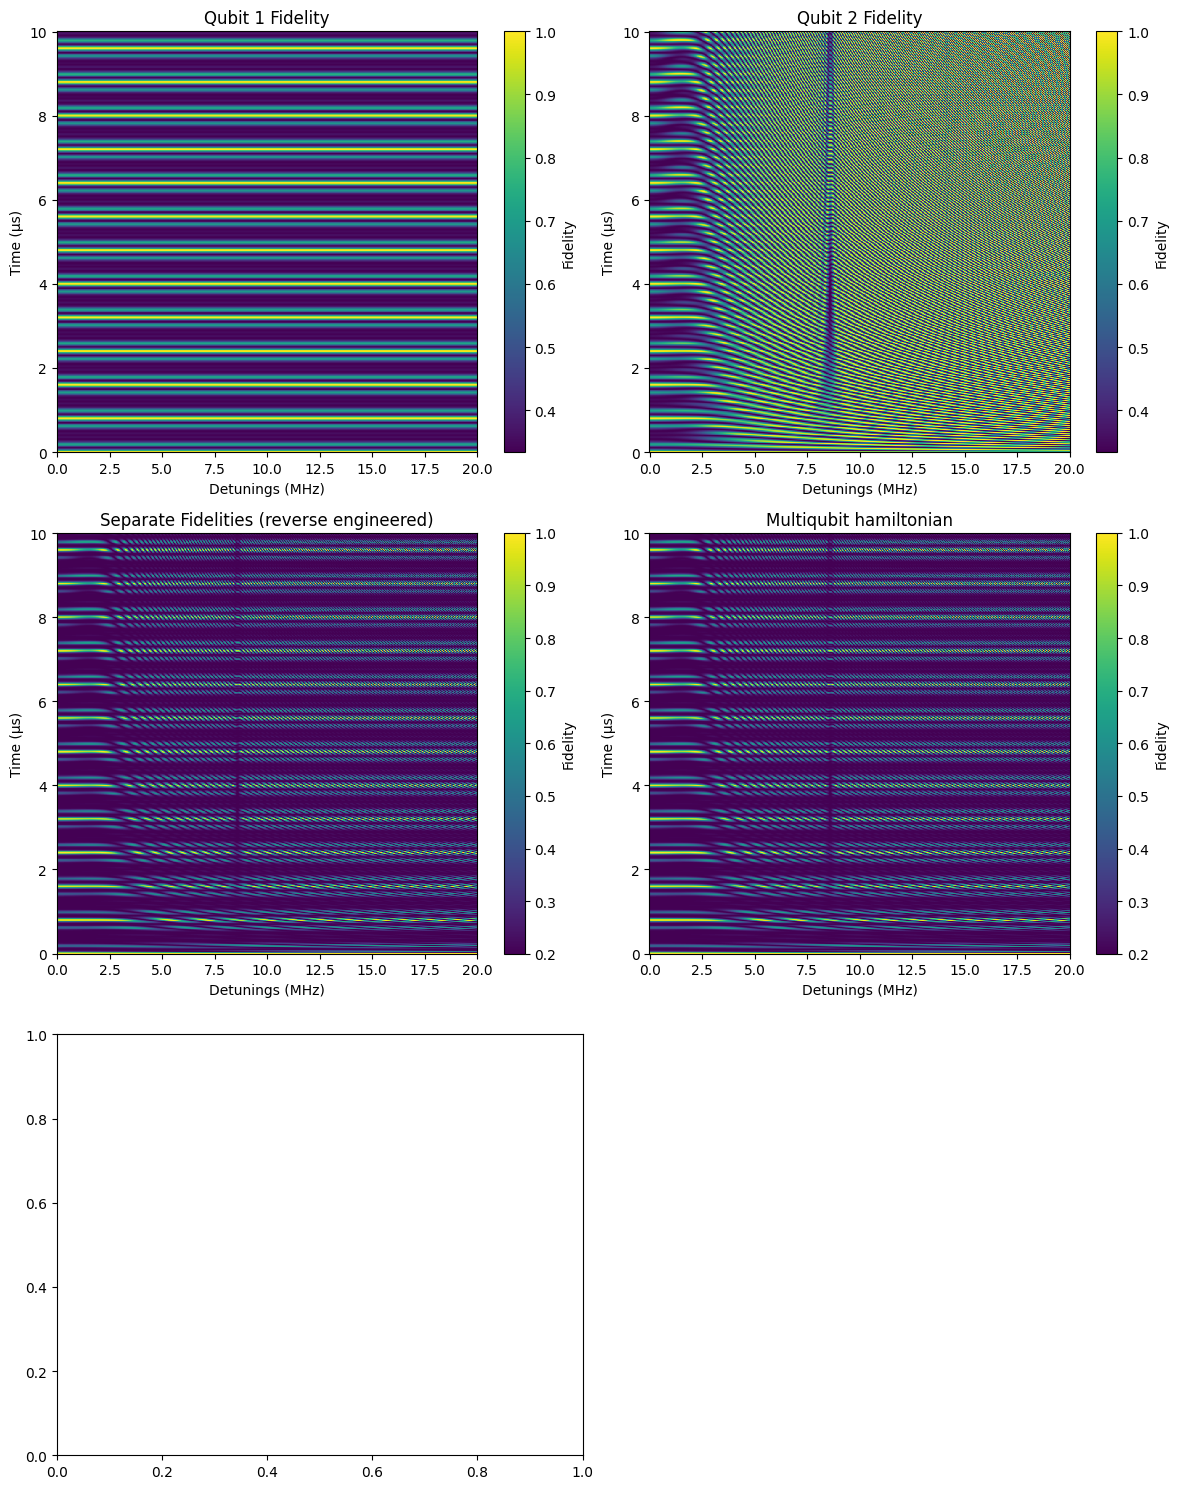

In [24]:
# Convert detunings to MHz and times to microseconds
detunings_mhz = detunings / 1e6

times_us = times[0] * 1e6


# Create a figure with 5 subplots in a 3x2 grid
fig, ((ax1, ax2), (ax3, ax4), (ax5, _)) = plt.subplots(3, 2, figsize=(12, 15))



# Create color plots
im1 = ax1.pcolormesh(detunings_mhz, times_us, np.array(fids_1).T, shading='auto', cmap='viridis')
im2 = ax2.pcolormesh(detunings_mhz, times_us, np.array(fids_2).T, shading='auto', cmap='viridis')
im3 = ax3.pcolormesh(detunings_mhz, times_us, np.array(fids_seperate).T, shading='auto', cmap='viridis')
im4 = ax4.pcolormesh(detunings_mhz, times_us, np.array(fids_together).T, shading='auto', cmap='viridis')
# im5 = ax5.pcolormesh(detunings_mhz, times_us, np.array(fid_combined_Us[0]).T, shading='auto', cmap='viridis')


# Add colorbars
fig.colorbar(im1, ax=ax1, label='Fidelity')
fig.colorbar(im2, ax=ax2, label='Fidelity')
fig.colorbar(im3, ax=ax3, label='Fidelity')
fig.colorbar(im4, ax=ax4, label='Fidelity')
# fig.colorbar(im5, ax=ax5, label='Fidelity')

# Set labels and titles
ax1.set_xlabel('Detunings (MHz)')
ax1.set_ylabel('Time (µs)')
ax1.set_title('Qubit 1 Fidelity')

ax2.set_xlabel('Detunings (MHz)')
ax2.set_ylabel('Time (µs)')
ax2.set_title('Qubit 2 Fidelity')

ax3.set_xlabel('Detunings (MHz)')
ax3.set_ylabel('Time (µs)')
ax3.set_title('Separate Fidelities (reverse engineered)')

ax4.set_xlabel('Detunings (MHz)')
ax4.set_ylabel('Time (µs)')
ax4.set_title('Multiqubit hamiltonian')

# ax5.set_xlabel('Detunings (MHz)')
# ax5.set_ylabel('Time (µs)')
# ax5.set_title('Combined Fidelities (Tensor Product)')

# Remove the empty subplot
_.remove()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

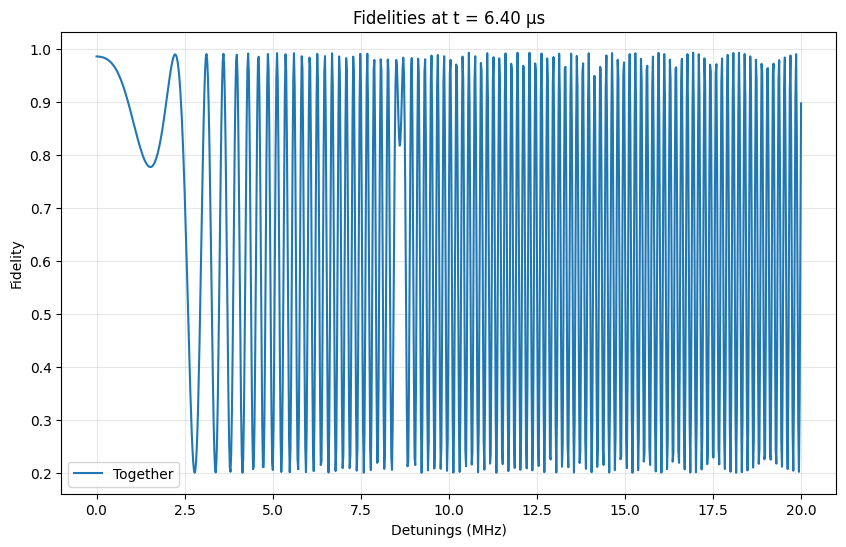

In [45]:
# Calculate the index closest to 12/rabi_freq in times_us
target_time = 32/rabi_freq * 1e6  # Convert to microseconds
time_index = np.abs(times_us - target_time).argmin()

# Create a figure
plt.figure(figsize=(10, 6))

# Plot fidelities vs detunings at the specific time

plt.plot(detunings/1e6, np.array(fids_together).T[time_index], label='Together')

# Add labels and title
plt.xlabel('Detunings (MHz)')
plt.ylabel('Fidelity')
plt.title(f'Fidelities at t = {target_time:.2f} µs')

# Add legend
plt.legend()

# Add grid
plt.grid(True, alpha=0.3)

# Show the plot
plt.show()

Hmmm - so it is very sensitive to the detuning? - If we had an averaging mechanism - either qm or just because the detuning is constnantly changing we would still only get the average of 0.6 or so?

## Next jobs
- average over a noise distro - is this entirely wise given the sensitivity to the second qubits detuning
- we want to also drive the second qubit???
- apply root x gate
- also compare with just normal dressing
- ideally want a simple metric inc the noise distro etc to present

- check transformations
- run for square pulse
- 

In [30]:
# Create a quantum system with a single qubit
natural_freq = 10 * 10**9
driving_freq = 10 * 10**9
rabi_freq = 5 * 10**6



# CCD parameters
phi_0, epsilon_m, phase_freq, theta_m = 0, rabi_freq/4, rabi_freq, 0



# Integration parameters
tol = 10**-9
evaluation_points = 1000
evaluation_time = 10*10**-6



In [31]:
import numpy as np
import multiprocess as mp  # Use multiprocess instead of multiprocessing
import dill  # For more robust serialization

detunings = np.linspace(0, 2*10e6, 100)

# Define processing function
def process_detuning(detuning, **kwargs):
    """Process a single detuning value with given parameters"""
    # Extract parameters from kwargs
    natural_freq = kwargs['natural_freq']
    evaluation_time = kwargs['evaluation_time']
    evaluation_points = kwargs['evaluation_points']
    driving_freq = kwargs['driving_freq']
    rabi_freq = kwargs['rabi_freq']
    phi_0 = kwargs['phi_0']
    epsilon_m = kwargs['epsilon_m']
    phase_freq = kwargs['phase_freq']
    theta_m = kwargs['theta_m']
    
    fids_1 = []
    fids_2 = []
    fids_seperate = []
    fids_together = []

    fid_combined_Us = []

    times, U1s = qt.calculate_unitaries(1, evaluation_time, evaluation_points, hamiltonians.ccd_rwa,
                            driving_freq=driving_freq,
                            natural_freq =  natural_freq, rabi_freq=rabi_freq, phi_0=phi_0,
                            epsilon_m=epsilon_m,
                            phase_freq=phase_freq,
                            theta_m=theta_m)
    fid_1 = qt.calculate_fidelities(np.eye(2), U1s, 2)




    # times, U2s = qt.calculate_unitaries(1, evaluation_time, evaluation_points, hamiltonians.ccd_lab, rtol=tol, atol=tol,
    # driving_freq=driving_freq,
    # natural_freq=natural_freq+detuning, rabi_freq=rabi_freq, phi_0=phi_0,
    # epsilon_m=epsilon_m,
    # phase_freq=phase_freq,
    # theta_m=theta_m)
    # fid_2 = qt.calculate_fidelities(np.eye(2), U2s, 2)

    # state = np.array([1 + 0j, 0 + 0j])
    # print(U2s[-1])
    # print(U2s[-1] @ state)




    # fid_seperate = (np.abs((6*fid_1-2)*(6*fid_2-2))+4)/20

    fids_1.append(fid_1)
    # fids_2.append(fid_2)
    # fids_seperate.append(fid_seperate)



    return (times, fid_1)#, fid_2, fid_seperate)

# Package parameters
params = {
    'natural_freq': natural_freq,
    'evaluation_time': evaluation_time,
    'evaluation_points': evaluation_points,
    'driving_freq': driving_freq,
    'rabi_freq': rabi_freq,
    'phi_0': phi_0,
    'epsilon_m': epsilon_m,
    'phase_freq': phase_freq,
    'theta_m': theta_m
}

# Create pool with dill serialization
if __name__ == '__main__':
    with mp.Pool() as pool:
        # Use partial to fix the kwargs
        worker = dill.dumps(lambda x: process_detuning(x, **params))
        results = pool.map(dill.loads(worker), detunings)

# Unpack results
times, fids_1, = zip(*results)#fids_2, fids_seperate 

TypeError: Dimensions of C (10, 10) should be one smaller than X(100) and Y(1000) while using shading='flat' see help(pcolormesh)

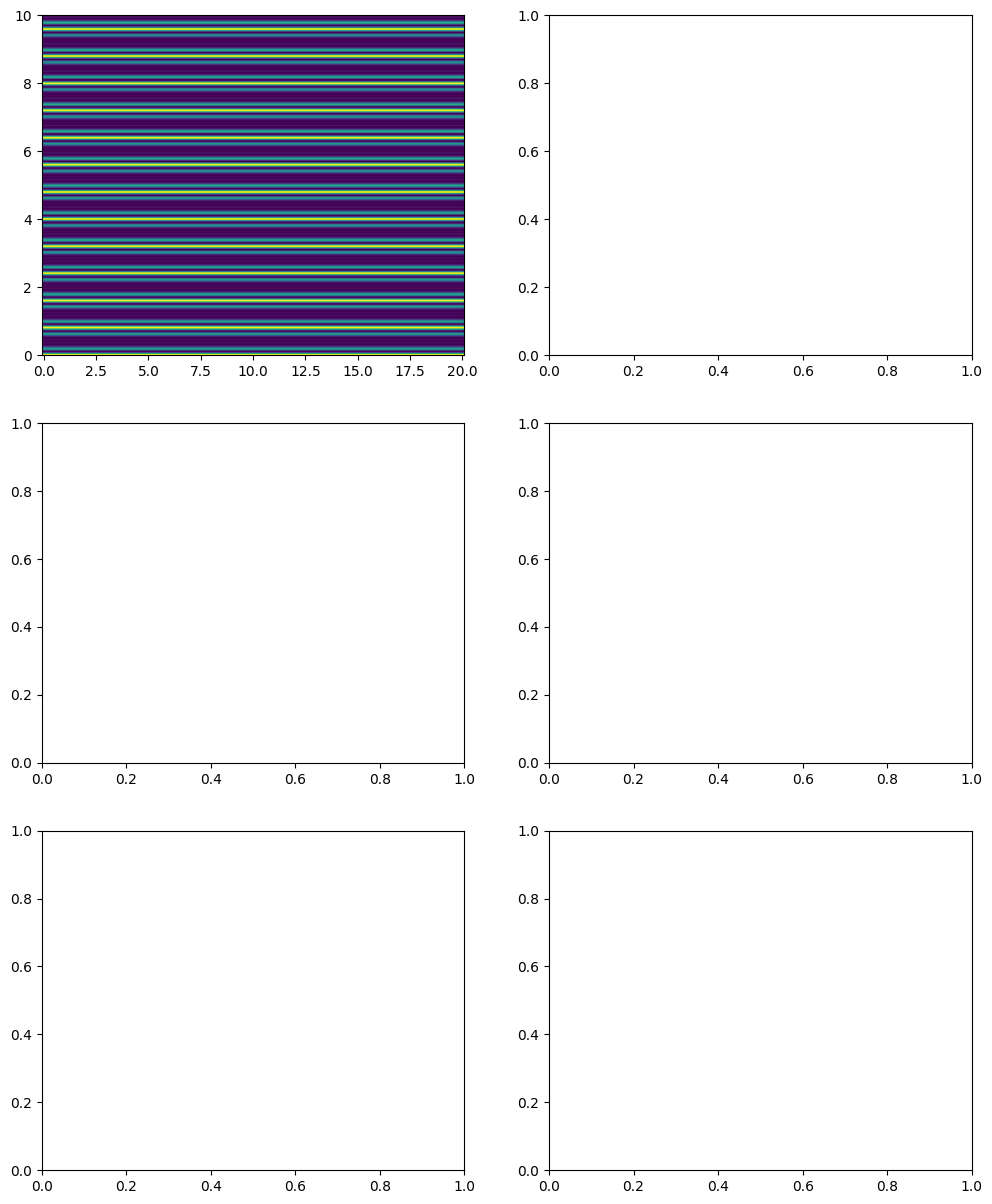

In [32]:
# Convert detunings to MHz and times to microseconds
detunings_mhz = detunings / 1e6

times_us = times[0] * 1e6


# Create a figure with 5 subplots in a 3x2 grid
fig, ((ax1, ax2), (ax3, ax4), (ax5, _)) = plt.subplots(3, 2, figsize=(12, 15))



# Create color plots
im1 = ax1.pcolormesh(detunings_mhz, times_us, np.array(fids_1).T, shading='auto', cmap='viridis')
im2 = ax2.pcolormesh(detunings_mhz, times_us, np.array(fids_2).T, shading='auto', cmap='viridis')
im3 = ax3.pcolormesh(detunings_mhz, times_us, np.array(fids_seperate).T, shading='auto', cmap='viridis')




# Add colorbars
fig.colorbar(im1, ax=ax1, label='Fidelity')
fig.colorbar(im2, ax=ax2, label='Fidelity')
fig.colorbar(im3, ax=ax3, label='Fidelity')



# Set labels and titles
ax1.set_xlabel('Detunings (MHz)')
ax1.set_ylabel('Time (µs)')
ax1.set_title('Qubit 1 Fidelity')

ax2.set_xlabel('Detunings (MHz)')
ax2.set_ylabel('Time (µs)')
ax2.set_title('Qubit 2 Fidelity')

ax3.set_xlabel('Detunings (MHz)')
ax3.set_ylabel('Time (µs)')
ax3.set_title('Separate Fidelities (reverse engineered)')


# Remove the empty subplot
_.remove()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()